finite triangular potential well + Coulomb impurity

In [1]:
### imports ###
import numpy as np
from scipy.sparse import diags #Allows us to construct our matrices
from scipy.sparse.linalg import eigsh #Solves the Eigenvalue problem
from numpy import linalg as la
import math as m

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### CONSTANTS ###

hbar = 1.054571817e-34   # Reduced Planck's constant 1.054571817×10−34 joule seconds
m = 5*9.1093837015e-31   # Mass of electron  9.1093837015 × 10−31 kg
e = 1.60218E-19          # elementary charge

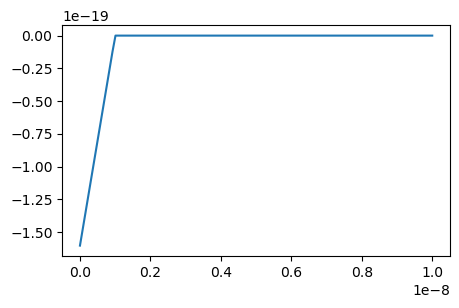

In [77]:
###  Triengle Potential well
L = 1e-9                 # Length of PW  
xmin = 0                 # the left edge
xmax = 10e-9             # the right edge

N = 120                           # Number of grid points
x = np.linspace(xmin, xmax, N)     # Grid points
dx = (xmax - xmin)/(N + 1)         # step


## Potential Well in J
W1 = 0.5*3.20435e-19  #  3.20435e-19J = 2 eV
W2 = 0.25*6.20435e-19

# W inside box (x < L/2) & (x > -L/2), 0 outside
#U = np.where((x < L/2) & (x > -L/2), 0, W1) 
s = W1/L # slope
Ut = np.zeros((N))  

for i in range(N):
    if x[i] < 0:
        Ut[i] = 0
    elif  x[i] >= 0 and x[i] <  L:
        Ut[i] = -W1 + s* x[i] 
    elif  x[i] > L:
        Ut[i] = 0
#print(Ut)    
plt.figure(figsize=(5,3))
plt.plot(x, Ut)
plt.show()

Coulomb Potential:  
$U_c = -k  \frac{Z  e^2}{\epsilon  \sqrt{|\rho^2 + (x - r_0)^2|}}$

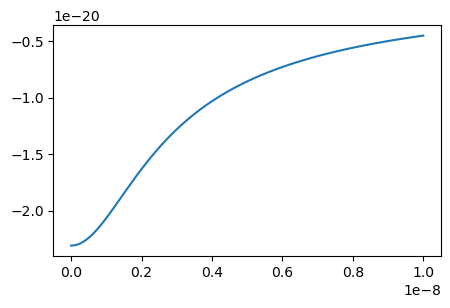

In [78]:
# Coulomb potential
Z = 2        # nuclear charge
eps = 10     # 
r = 2e-9     #  ρ
r0 = 0       # Coulomp center location [0 -> ∞]

k = 8.98755e9  #  Coulomb's constant

#Uc = -k * (Z**0.5) * e**2 / (eps * (((r - r0)**2 + x**2)**0.5))
Uc = -k * Z * e**2 / (eps * ((abs(r**2 + (x - r0)**2))**0.5))


plt.figure(figsize=(5,3))
#plt.xlim(0,10e-9)
plt.plot(x, Uc)
plt.show()

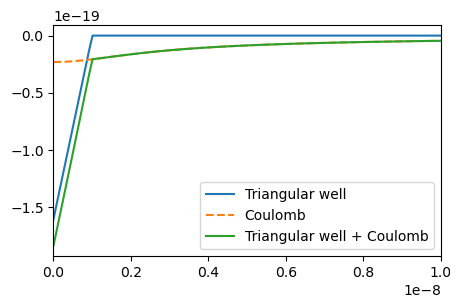

In [79]:
# Ut + Uc
plt.figure(figsize=(5,3))
plt.plot(x, Ut)
plt.plot(x, Uc,'--')
plt.plot(x, Ut+Uc)
plt.legend(["Triangular well", "Coulomb", "Triangular well + Coulomb"], loc ="lower right")
plt.xlim(0,10e-9)
plt.show()

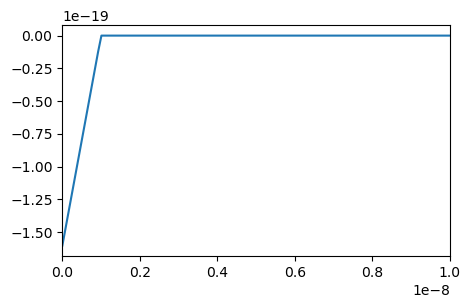

In [80]:
#switch potential:
p = 1   # 0 for Ut+Uc, 1 for only Ut
if p == 1:
    U = Ut
else:
    U = Ut+Uc

    
# plot selected potential
plt.figure(figsize=(5,3))
plt.plot(x, U)
plt.xlim(0,10e-9)
plt.show()


In [81]:
# Hamiltonian Matrix H/(dx**2) 
d2dx2 = diags([1, -2, 1], offsets=[-1, 0, 1], shape=(N, N))/(dx**2)

# Kinetic energy operator  
T = -(hbar**2)/(2 * m) * d2dx2

#  potential energy operator
V = diags([U], offsets=[0], shape=(N, N))
# hamiltonian
H = T + V

In [82]:
# Convert dia_matrix to NumPy array
H = H.toarray()
eigvals, eigvecs = la.eig(H)
#print(eigvals)

-0.622
4.459
4.4617
4.4546


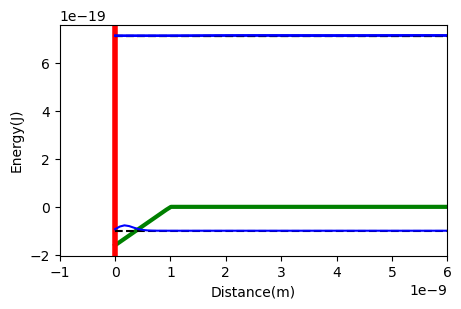

In [83]:
### PLOTTING ###
scale = 3e-10
plt.figure(figsize=(5,3))
plt.plot(x, U, linewidth=3, color = 'g')
#plt.plot(x, Ut)
#plt.plot(x, Uc,'--')
#plt.plot(x, Ut+Uc)
#plt.legend(["Triangular well", "Coulomb", "Triangular well + Coulomb"], loc ="lower right")
plt.axvline(x=0, color='r', linewidth=4)
for i in range(4):
    plt.plot(x, np.full_like(x, eigvals[i]), "k--")                  # Energy
    #plt.plot(x, eigvals[i] + eigvecs[:, i] * scale, 'red')          # wave function
    #plt.ylim(-0.1e-17, 0.19e-16)
    plt.xlim(-0.1e-8,0.6e-8)
    plt.xlabel('Distance(m)')
    plt.ylabel("Energy(J)")
    plt.plot(x, eigvals[i] + eigvecs[:, i] * eigvecs[:, i].conj() * scale * scale, 'b')   # probability distribution
    #plt.legend(["well", "energy", "Probability"], loc ="lower right")
    print(round((eigvals[i])/1.60218e-19,4))  # converted to eV
    #print(eigvals[i])
plt.show()